In [6]:
import numpy as np
import cPickle
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
parameters = np.load("final_parameter.pkl")

In [31]:
parameters.shape

(5, 10, 194)

In [27]:
np.sum(np.sum(parameters,axis=2),axis=1)

array([  21.91508488,   42.43333506,   59.22130956,  -21.51880863,
        117.94491202])

In [28]:
toPCA = np.zeros((parameters.shape[0]*parameters.shape[1],parameters.shape[2]))
for i in range(parameters.shape[0]):
    for j in range(parameters.shape[1]):
        index = i * parameters.shape[0] + j
        toPCA[index,:] = parameters[i,j,:]

In [29]:
pca = PCA(n_components=2, whiten=False)
X_r = pca.fit_transform(toPCA)
kmeans = KMeans(n_clusters=5).fit_predict(X_r)

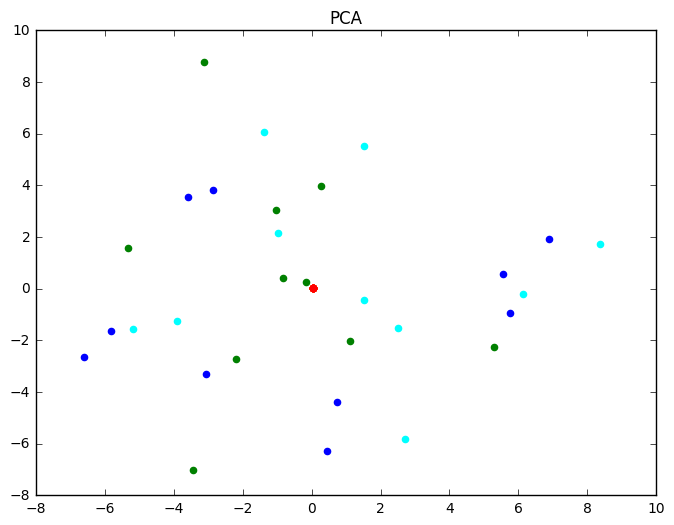

In [30]:
plt.figure()
colors = ["blue","cyan","green","orange","red"]
for i in range(X_r.shape[0]):
    plt.scatter(X_r[i,0],X_r[i,1],color = colors[i/10])
plt.title('PCA')
plt.show()